# 图像初步分析

In [11]:
import cv2 as cv
import matplotlib.pyplot as plt

import configuration.config as config

## 说明

1. OpenCV 和其他库的颜色空间差异
OpenCV 默认使用 BGR 颜色空间来存储图像数据，而许多其他图像处理库（如 Matplotlib、PIL）使用 RGB 颜色空间。为了将图像正确显示或处理，通常需要将图像从 BGR 转换为 RGB。


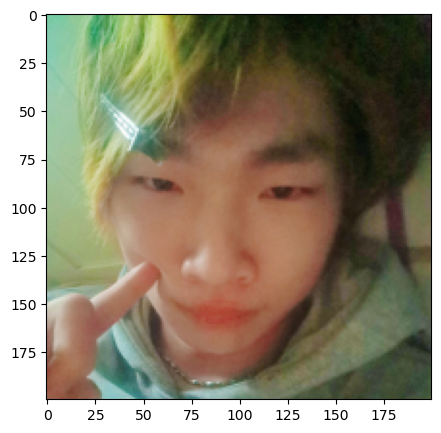

In [12]:
# 导入图像
img = cv.imread(config.TEST_IMAGE)

# 窗口显示图像
# cv.imshow("cutebuzhen", img)
# k = cv.waitKey(0)

# 显示图像
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

## 检查图像的基本属性

In [3]:

# 图像形状
img.shape
print(f"图像形状: {img.shape}")

# 图像尺寸
height, width, channels = img.shape
print(f"图像宽度: {width}, 图像高度: {height}, 通道数: {channels}")

# 图像数据类型
print(f"图像数据类型: {img.dtype}")

# 图像的总像素数
total_pixels = height * width
print(f"总像素数: {total_pixels}")

图像形状: (200, 200, 3)
图像宽度: 200, 图像高度: 200, 通道数: 3
图像数据类型: uint8
总像素数: 40000



## 显示图像的直方图

图像中像素值的分布情况


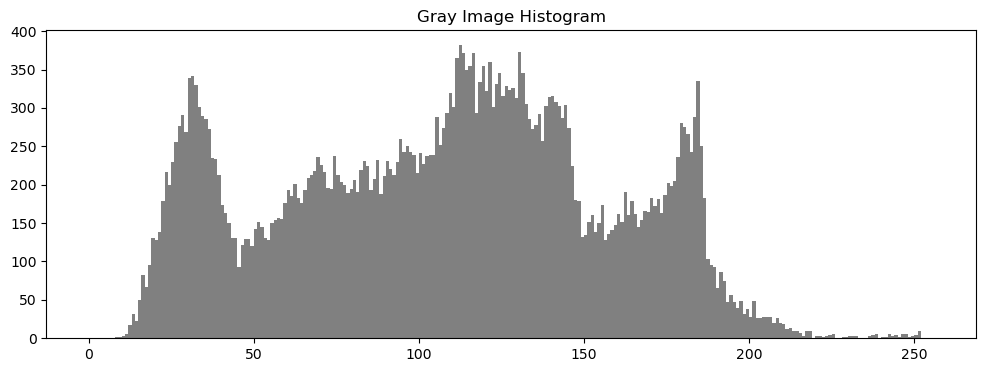

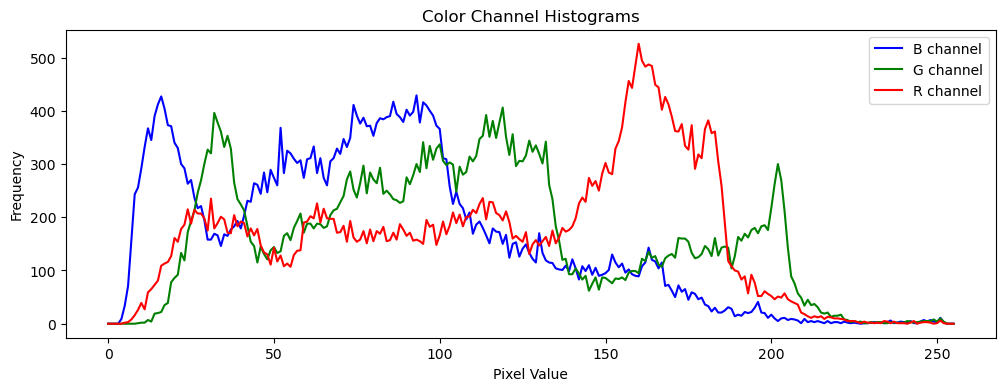

In [4]:
# 灰度图像直方图：
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 4))
plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color="gray")
plt.title("Gray Image Histogram")
plt.show()

# 彩色图像直方图：
colors = ("b", "g", "r")
# 创建一个绘图对象
plt.figure(figsize=(12, 4))

# 遍历每个颜色通道
for i, color in enumerate(colors):
    # 计算每个通道的直方图
    hist = cv.calcHist([img], [i], None, [256], [0, 256])
    # 在同一个图中绘制直方图
    plt.plot(hist, color=color, label=f"{color.upper()} channel")

# 设置标题和标签
plt.title("Color Channel Histograms")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()

# 显示图像
plt.show()


## 计算图像的基本统计信息


In [5]:
# 像素均值和标准差
mean, stddev = cv.meanStdDev(img)
print(f"均值: {mean.flatten()}, 标准差: {stddev.flatten()}")

均值: [ 78.356525 106.50625  117.8498  ], 标准差: [44.93008641 52.16426421 53.42231453]



## 查看图像的一些重要区域


In [6]:
# 查看图像中心的像素值
center_x, center_y = width // 2, height // 2
center_pixel = img[center_y, center_x]
print(f"中心像素值: {center_pixel}")

中心像素值: [ 71 101 160]



## 图像的色彩空间分析


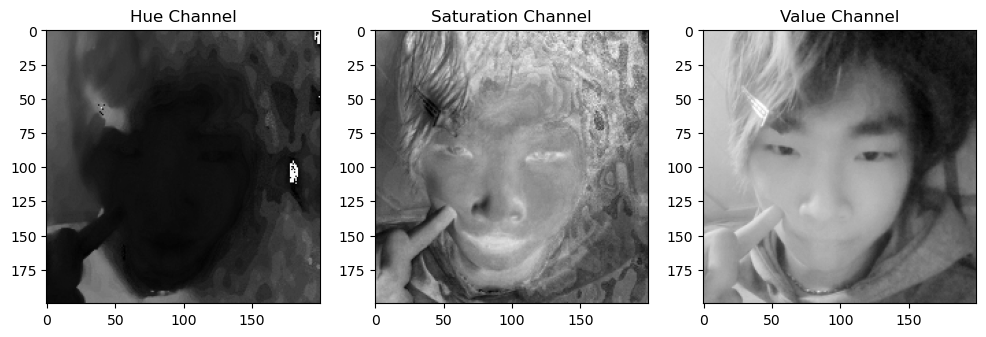

In [7]:
# 查看图像的颜色分布
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv_img)

plt.figure(figsize=(12, 4))

plt.subplot(131), plt.imshow(h, cmap="gray"), plt.title("Hue Channel")
plt.subplot(132), plt.imshow(s, cmap="gray"), plt.title("Saturation Channel")
plt.subplot(133), plt.imshow(v, cmap="gray"), plt.title("Value Channel")
plt.show()


## 检测和识别图像中的特征


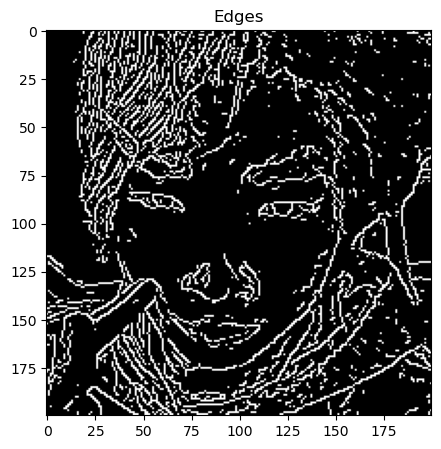

In [8]:
# 边缘检测
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
edges = cv.Canny(gray_img, 49, 50)

plt.figure(figsize=(10, 5))
plt.imshow(edges, cmap='gray')
plt.title('Edges')
plt.show()

# cv.imshow("Edges", edges)
# cv.waitKey(0)
# cv.destroyAllWindows()